# Plot maps of precipitation

rainfall in CM2: fld_s05i214

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 126.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36441,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 126.00 GiB
Comm: tcp://127.0.0.1:35301,Total threads: 4
Dashboard: /proxy/37555/status,Memory: 18.00 GiB
Nanny: tcp://127.0.0.1:37785,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

#### Load data

In [6]:
precip_CM2_025 = xr.open_dataarray(path_to_data + 'precip_400_499.nc');

0.3.0


In [12]:
precip_CM2_025 = precip_CM2_025.resample(time='Y').mean().sel(time=slice('0400-01-01','0499-12-31'))

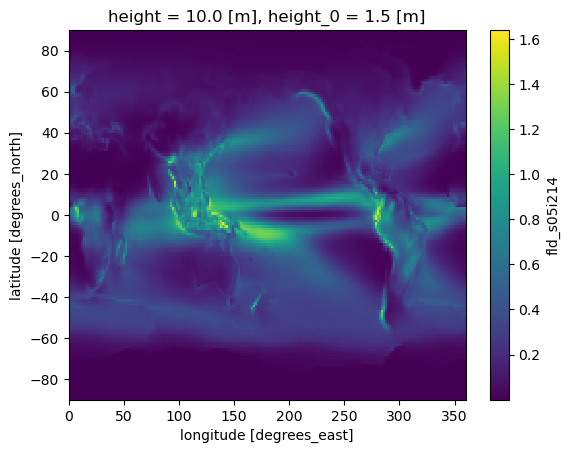

In [15]:
precip_CM2_025.mean('time').plot()

#### Import data from raw files

In [8]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

CM2-025

In [ ]:
%%time
precip_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s05i214', session_CM2, start_time=start_time, end_time=end_time, frequency='1 monthly')
precip_CM2_025 = precip_CM2_025 * (60*60*24) / 1000 * 100 # kg/m2/a -> mm/day, assuming 1000 kg/m3
precip_CM2_025.to_netcdf(path_to_data + 'precip_400_499.nc')

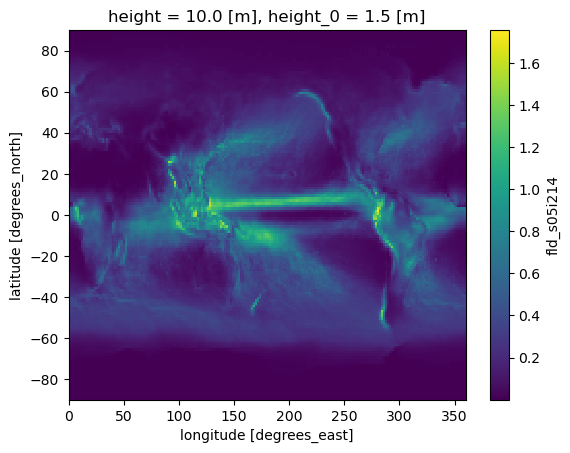

In [11]:
precip_CM2_025.mean('time').plot()

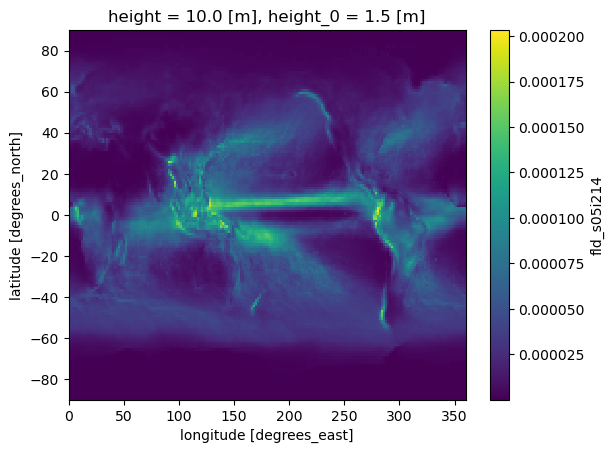

In [12]:
test.mean('time').plot()

CM2-1

In [ ]:
# atm data not in the database, load directly

In [20]:
path_bz687 = '/g/data/p73/archive/non-CMIP/ACCESS-CM2/bz687/history/atm/netCDF/'

year  = np.arange(400,499,1)
month = np.arange(1,13,1)

In [21]:
%%time
for yy in year:
    for mm in month:
        # Get correct file name
        if mm < 10:
            file_name = 'bz687a.pm0' + str(yy) + '0' + str(mm) + '_mon.nc'
        else:
            file_name = 'bz687a.pm0' + str(yy) + str(mm) + '_mon.nc'
        # Load precip for this year and month
        data = xr.open_dataset(path_bz687 + file_name)
        precip_tmp = data.fld_s05i214
        # Concatenate data in time
        if yy == 400 and mm == 1:
            precip = precip_tmp
        else:
            precip = xr.concat([precip, precip_tmp], dim='time')

CPU times: user 6min 31s, sys: 2min 10s, total: 8min 42s
Wall time: 30min 1s


In [22]:
precip_CM2_1 = precip * (60*60*24) / 1000 * 100 # kg/m2/a -> mm/day, assuming 1000 kg/m3

In [26]:
# Saving
precip_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/precip_CM2_1_monthly_400_499.nc')

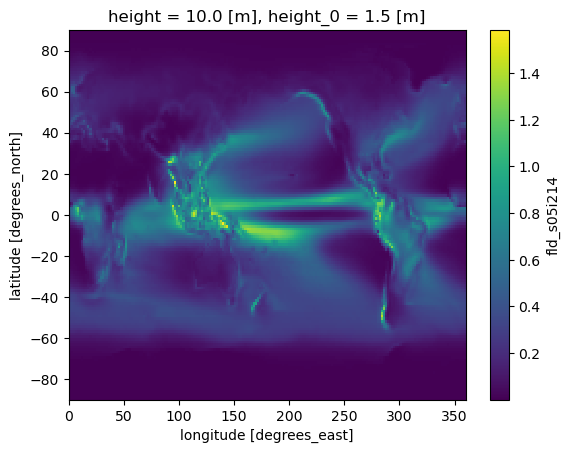

In [27]:
precip_CM2_1.mean('time').plot()